In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("HeartDisease.csv")

In [3]:
data.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Analysis of data

([<matplotlib.patches.Wedge at 0x1a567a00150>,
 [Text(-0.1534669293828939, 1.0892418930548835, 'Have heart disease'),
  Text(0.1534670313650796, -1.0892418786862677, 'Donot have heart disease')],
 [Text(-0.08370923420885121, 0.5941319416663, '54.5'),
  Text(0.08370928983549797, -0.5941319338288732, '45.5')])

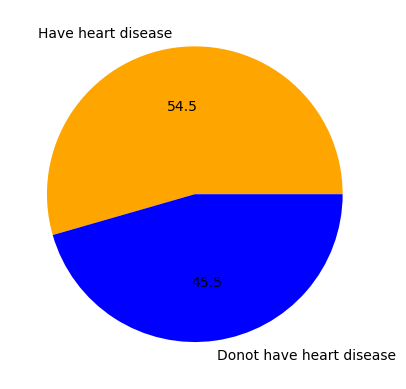

In [5]:
size = data["target"].value_counts().values
label = ["Have heart disease" , "Donot have heart disease"]
color = ["orange" , "blue"]
plt.pie(size  , labels = label ,colors= color ,autopct = "%1.1f" )

# Majority of people have  heart disease

<Axes: xlabel='age', ylabel='Density'>

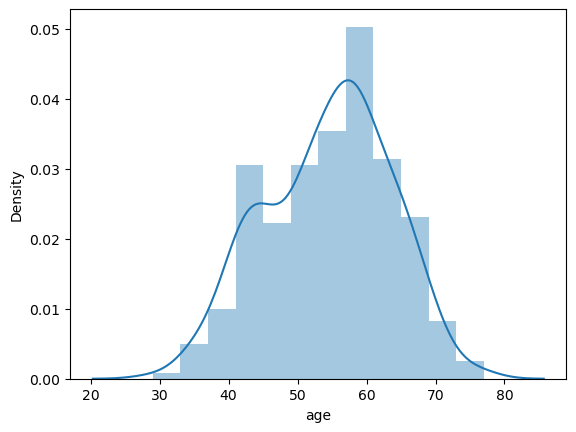

In [6]:
sns.distplot(data["age"])

# we have maximun people with age ranging between 50 - 60

<Axes: xlabel='gender', ylabel='count'>

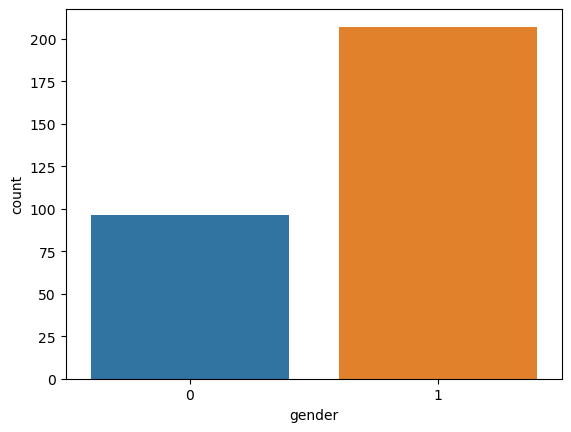

In [7]:
sns.countplot(x = data["gender"] , data = data)

# We have majority of Female in our data set 

<Axes: xlabel='gender', ylabel='count'>

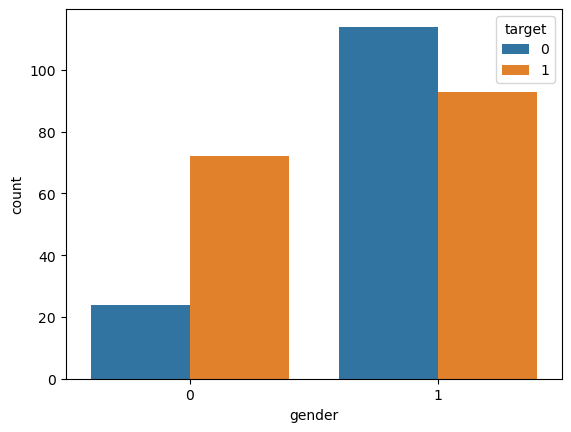

In [8]:
sns.countplot(x = "gender" , hue = "target" , data = data)

# Majority of females have heart attack problems 

<Axes: xlabel='age', ylabel='cholestrol'>

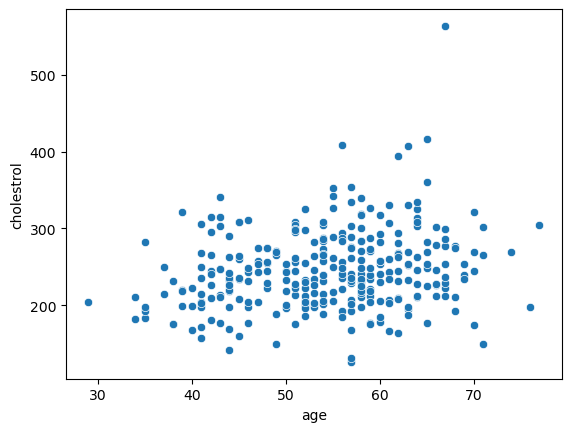

In [9]:
sns.scatterplot(x = "age" , y = "cholestrol" , data = data)

# Majority of cholestrol problems come to people after the age of 50

<Axes: xlabel='cholestrol', ylabel='Density'>

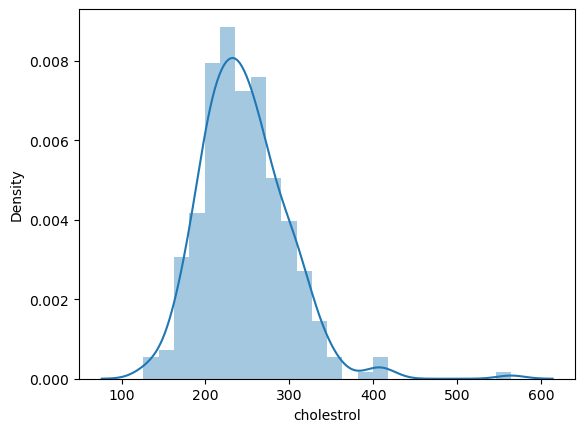

In [10]:
sns.distplot(data["cholestrol"])

<Axes: xlabel='chest_pain', ylabel='count'>

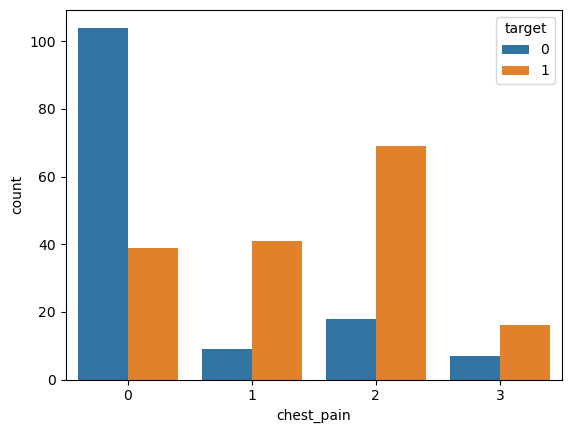

In [11]:
sns.countplot(x = "chest_pain" , hue = "target" , data = data)

<Axes: xlabel='fasting_blood_sugar', ylabel='count'>

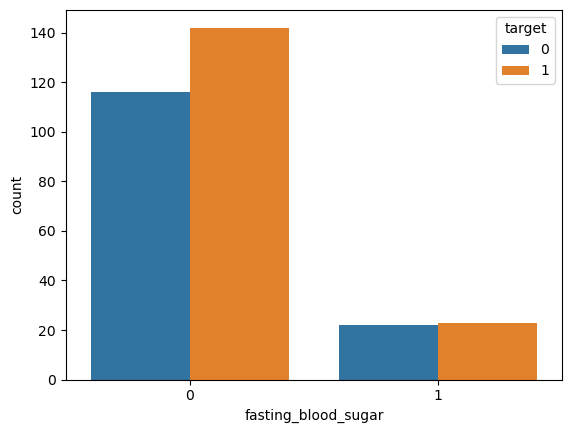

In [12]:
sns.countplot(x = "fasting_blood_sugar" , hue = "target" , data = data)

<Axes: xlabel='rest_ecg', ylabel='count'>

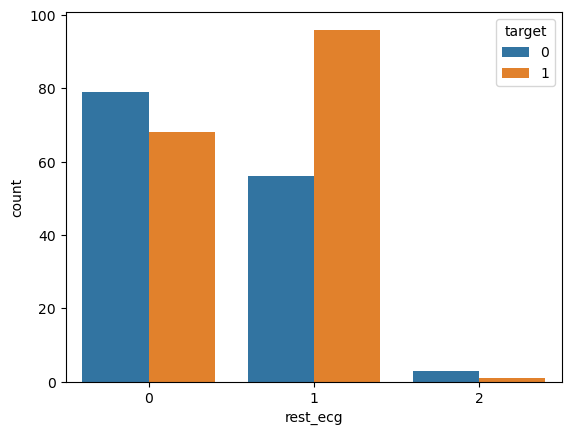

In [13]:
sns.countplot(x = "rest_ecg" , hue = "target" , data = data)

<Axes: xlabel='exer_angina', ylabel='count'>

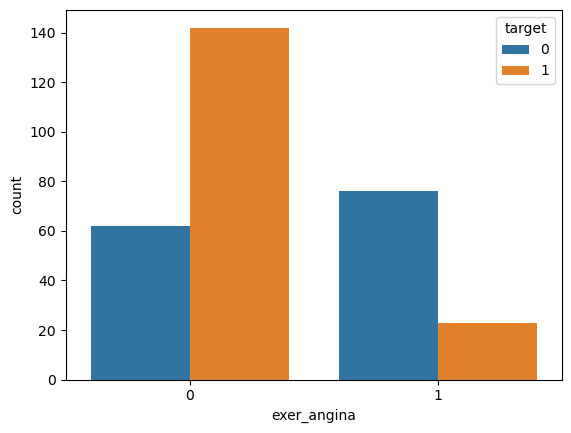

In [14]:
sns.countplot(x = "exer_angina" , hue = "target" , data = data)

<Axes: xlabel='slope', ylabel='count'>

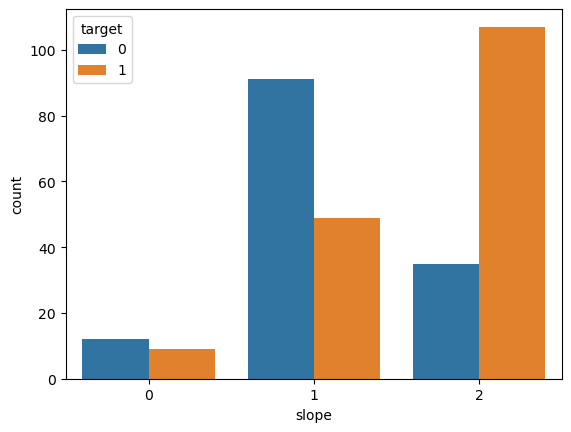

In [15]:
sns.countplot(x = "slope" , hue = "target" , data = data)

# Feature selection

In [16]:
from sklearn.feature_selection import chi2

In [17]:
x1 = data.drop("target" , axis = 1)
y1 = data["target"]

In [18]:
score = chi2(x1 , y1)

In [19]:
score

(array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
         23.93639448,   0.20293368,   2.97827075, 188.32047169,
         38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
          5.79185297]),
 array([1.39567266e-06, 5.91231763e-03, 2.53498179e-15, 1.18028642e-04,
        9.95714828e-07, 6.52363208e-01, 8.43893904e-02, 7.39510166e-43,
        4.42807388e-10, 1.55258340e-17, 1.74123685e-03, 3.60567663e-16,
        1.61006098e-02]))

In [20]:
p_value = pd.Series(score[1] , index =x1.columns)

In [21]:
p_value

age                    1.395673e-06
gender                 5.912318e-03
chest_pain             2.534982e-15
rest_bps               1.180286e-04
cholestrol             9.957148e-07
fasting_blood_sugar    6.523632e-01
rest_ecg               8.438939e-02
thalach                7.395102e-43
exer_angina            4.428074e-10
old_peak               1.552583e-17
slope                  1.741237e-03
ca                     3.605677e-16
thalassemia            1.610061e-02
dtype: float64

In [22]:
irr_cols=[]
for x in p_value.index:
    if p_value[x]<=0.05:
        print(x,":-Reject the null hypothesis")
    else:
        print(x,":-Accept the null hypothesis")
        irr_cols.append(x)

age :-Reject the null hypothesis
gender :-Reject the null hypothesis
chest_pain :-Reject the null hypothesis
rest_bps :-Reject the null hypothesis
cholestrol :-Reject the null hypothesis
fasting_blood_sugar :-Accept the null hypothesis
rest_ecg :-Accept the null hypothesis
thalach :-Reject the null hypothesis
exer_angina :-Reject the null hypothesis
old_peak :-Reject the null hypothesis
slope :-Reject the null hypothesis
ca :-Reject the null hypothesis
thalassemia :-Reject the null hypothesis


In [23]:
irr_cols

['fasting_blood_sugar', 'rest_ecg']

In [24]:
r = data.corr()

In [25]:
r

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [26]:
data.drop(["exer_angina" , "old_peak"] , axis = 1 , inplace = True)

# Model Evaluation

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = data.drop("target" , axis = 1)
y = data["target"]

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 36)

# Model building

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
ds = DecisionTreeClassifier()

In [32]:
ds.fit(x_train , y_train)

DecisionTreeClassifier()

In [33]:
pred = ds.predict(x_test)

# Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score , f1_score , roc_auc_score , classification_report , confusion_matrix 

In [35]:
print("Accuracy score : " , accuracy_score(y_test , pred ))

Accuracy score :  0.7540983606557377


In [36]:
print("F1 score :" , f1_score(y_test , pred))

F1 score : 0.8192771084337349


In [37]:
print("AUC score :" , roc_auc_score(y_test , pred))

AUC score : 0.7082379862700229


# Model Enhancement 

In [38]:
dt = DecisionTreeClassifier(criterion = "entropy" , max_depth = 3 , min_samples_split = 35)

In [39]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [40]:
preds = dt.predict(x_test)

In [41]:
print("Accuracy score : " , accuracy_score(y_test , preds ))

Accuracy score :  0.7868852459016393


In [42]:
print("F1 score :" , f1_score(y_test , preds))

F1 score : 0.8354430379746836


In [43]:
print("AUC score :" , roc_auc_score(y_test , preds))

AUC score : 0.7602974828375286


# Grid Model

In [44]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [45]:
max_depth = [int(x) for x in np.linspace(5 , 50 , 20)]

In [46]:
min_sample_split =[5 , 10 , 15 , 20 , 25 , 35 , 40]

In [47]:
param_grid = {'max_depth':max_depth , "min_samples_split":min_sample_split , "criterion" :["entropy" , "giniquity"]}

In [48]:
grid_search = GridSearchCV(dt , param_grid , cv = 3)

In [49]:
grid_search.fit(x_train , y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_split=35),
             param_grid={'criterion': ['entropy', 'giniquity'],
                         'max_depth': [5, 7, 9, 12, 14, 16, 19, 21, 23, 26, 28,
                                       31, 33, 35, 38, 40, 42, 45, 47, 50],
                         'min_samples_split': [5, 10, 15, 20, 25, 35, 40]})

In [50]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15)

In [51]:
grid_search.best_score_

0.7930555555555555

In [52]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 15}

In [53]:
dt_grid = DecisionTreeClassifier(criterion="entropy", max_depth= 5, min_samples_split= 15)

# Random Search 

In [54]:
param_rand = {'max_depth':max_depth , "min_samples_split":min_sample_split , "criterion" :["entropy" , "giniquity"]}

In [55]:
random_search = RandomizedSearchCV(dt , param_rand , cv = 3)

In [56]:
random_search.fit(x_train , y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    min_samples_split=35),
                   param_distributions={'criterion': ['entropy', 'giniquity'],
                                        'max_depth': [5, 7, 9, 12, 14, 16, 19,
                                                      21, 23, 26, 28, 31, 33,
                                                      35, 38, 40, 42, 45, 47,
                                                      50],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              35, 40]})

In [57]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15)

In [58]:
random_search.best_score_

0.7930555555555555

In [59]:
random_search.best_params_

{'min_samples_split': 15, 'max_depth': 5, 'criterion': 'entropy'}